In [80]:
import warnings
warnings.filterwarnings("ignore")

In [81]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [82]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [83]:
X_train[0].shape

(28, 28)

<Figure size 640x480 with 0 Axes>

<Figure size 50x30 with 0 Axes>

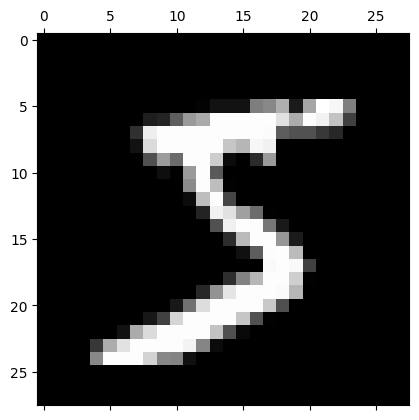

In [84]:
plt.gray()
plt.figure(figsize=(0.5,0.3))
plt.matshow(X_train[0])

In [85]:
len(X_train.ravel())

47040000

In [86]:
y_train.shape

(60000,)

In [87]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [88]:
# Without Scaling
model1 = keras.Sequential([
    keras.layers.Dense(10,input_shape= (784,),activation="sigmoid")
])

model1.compile(
    optimizer = "adam",
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

model1.fit(X_train_flatten,y_train, epochs =5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.7650 - loss: 18.9115
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.8773 - loss: 6.1120
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step - accuracy: 0.8855 - loss: 5.5866
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 851us/step - accuracy: 0.8857 - loss: 5.2860
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 846us/step - accuracy: 0.8878 - loss: 5.2915


In [89]:
from sklearn.preprocessing import MinMaxScaler
scm = MinMaxScaler()
X_train_scaled = scm.fit_transform(X_train_flatten)
X_test_scaled = scm.fit_transform(X_test_flatten)

In [90]:
X_test_scaled.shape

(10000, 784)

In [91]:
# Fitting with Scaled Variables
model2 = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,), activation = "sigmoid")
])

model2.compile(
    optimizer = "adam",
    loss ='sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

model2.fit(X_train_scaled,y_train, epochs =5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - accuracy: 0.8096 - loss: 0.7311
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step - accuracy: 0.9132 - loss: 0.3099
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 858us/step - accuracy: 0.9201 - loss: 0.2854
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - accuracy: 0.9232 - loss: 0.2753
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 846us/step - accuracy: 0.9266 - loss: 0.2647


In [92]:
model2.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.9157 - loss: 0.3046


[0.2696985602378845, 0.9262999892234802]

<Figure size 640x480 with 0 Axes>

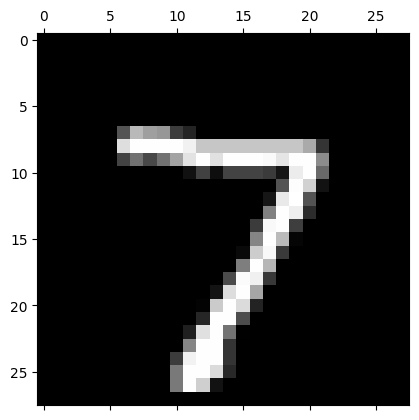

In [93]:
plt.gray()
plt.matshow(X_test[0])

In [94]:
y_predicted = model2.predict(X_test_scaled)
print(y_predict[0])
print(f"Number: {np.argmax(y_predict[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step
[4.7666289e-02 3.3661121e-07 8.3554693e-02 9.6391201e-01 2.4814680e-03
 1.0684880e-01 1.4432891e-06 9.9983412e-01 6.4968601e-02 6.6410881e-01]
Number: 7


In [102]:
ls = []
for i in range(len(y_test)):
    ls.append(np.argmax(y_predicted[i]))

nd_predicted = np.array(ls)
nd_predicted[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [96]:
pred_comp = [np.argmax(x) for x in y_predicted]

Text(0.5, 1.0, 'Confusion Matrix')

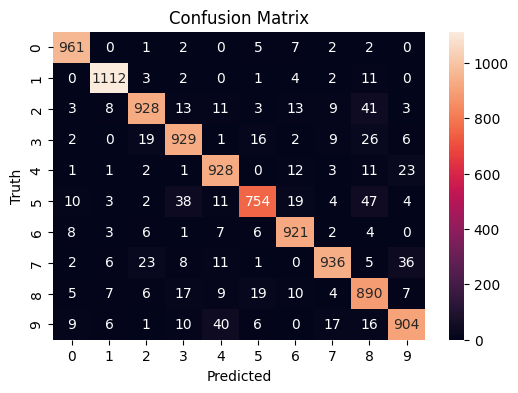

In [97]:
import seaborn as sns
cm  = tf.math.confusion_matrix(y_test,pred_comp)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot = True,fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")

In [98]:
X_test_flatten.shape

(10000, 784)

In [99]:
# Neural Network with Hidden Layers
model3 = keras.Sequential([
    keras.layers.Dense(100, input_shape= (784,), activation= "relu"),
    keras.layers.Dense(10, activation= "sigmoid")
])

model3.compile(
    optimizer = "adam",
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

model3.fit(X_train_scaled,y_train,epochs = 10)



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8666 - loss: 0.4588
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9605 - loss: 0.1382
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9730 - loss: 0.0911
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9793 - loss: 0.0692
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9848 - loss: 0.0495
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9871 - loss: 0.0415
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9908 - loss: 0.0318
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9921 - loss: 0.0265
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9938 - loss: 0.0211
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9951 - loss: 0.0172


In [100]:
model3.evaluate(X_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9754 - loss: 0.0884


[0.07808177173137665, 0.9785000085830688]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step


Text(0.5, 1.0, 'Modified Confusion Matrix')

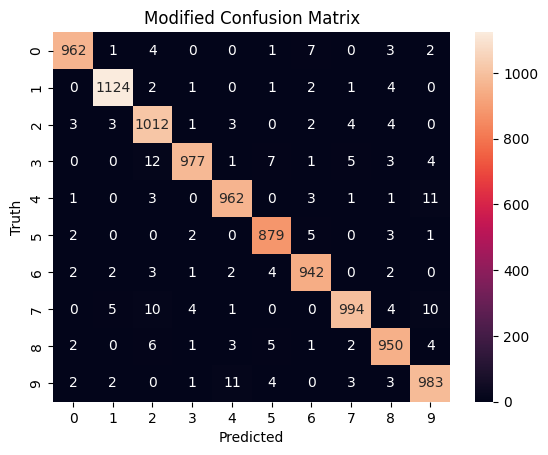

In [101]:
y_hpredicted = model3.predict(X_test_scaled)
y_label = [np.argmax(i) for i in y_hpredicted]
cm2 = tf.math.confusion_matrix(y_test,y_label)
sns.heatmap(cm2,annot= True, fmt= "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Modified Confusion Matrix")